In [1]:
# read csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

In [2]:
# LUCAS_cqr = pd.read_csv('D:\Conformal_prediction_all_exprs\Conformal_Prediction_DSM\LUCAS_2015_BootRF.csv') #This is the final result of CQR
LUCAS_cqr = pd.read_csv('D:\Conformalized_Quantile_Regression\LUCAS_2015_rf.csv') #This is the final result of RF
# LUCAS_cqr = pd.read_csv('D:\Conformalized_Quantile_Regression\LUCAS_2015_cqr.csv') #This is the final result of RF

# LUCAS_cqr = pd.read_csv('D:\Conformal_prediction_all_exprs\Conformal_Prediction_DSM\LUCAS_2015_QRF.csv') #This is the final result of QRF
LUCAS_all = pd.read_csv('D:\Conformalized_Quantile_Regression\LUCAS_2015_all.csv')

In [3]:
LUCAS_cqr

,lower_oc,upper_oc,predicted_oc,standard_uncertainty,test_oc,Point_ID
0,36.639847,46.757152,41.698500,0.164928,60.8,28762270
1,28.703504,66.926127,47.814815,0.623090,9.7,53723904
2,24.335435,39.862119,32.098777,0.253110,173.4,42643252
3,15.718832,31.882648,23.800740,0.263496,12.3,53023608
4,11.338693,17.259962,14.299328,0.096526,15.2,49763304
...,...,...,...,...,...,...
4367,23.452268,29.758095,26.605181,0.102795,11.4,43043486
4368,7.977015,10.740932,9.358974,0.045056,15.8,32381944
4369,17.379394,27.388966,22.384180,0.163172,12.6,41342740
4370,15.851911,20.074580,17.963246,0.068836,24.9,32502072


In [4]:
# from cqr import helper

# y_test = np.asarray(LUCAS_cqr['test_oc'])
# lower = np.asarray(LUCAS_cqr['lower_oc'])
# upper = np.asarray(LUCAS_cqr['upper_oc'])

# coverage_QRF, length_QRF = helper.compute_coverage(np.array(y_test),np.array(lower),np.array(upper),0.1,'RF')

In [5]:
import uncertainty_toolbox as uct

y = np.asarray(LUCAS_cqr['test_oc'])

predictions = list(zip(np.asarray(LUCAS_cqr['lower_oc']), np.asarray(LUCAS_cqr['upper_oc'])))
predictions_std = [np.std(sample) for sample in predictions]
y_pred = [np.mean(sample) for sample in predictions]

# Compute all uncertainty metrics
metrics = uct.metrics.get_all_metrics(np.array(y_pred), np.array(predictions_std), np.array(y))

 (1/n) Calculating accuracy metrics
 (2/n) Calculating average calibration metrics
 (3/n) Calculating adversarial group calibration metrics
  [1/2] for mean absolute calibration error
Measuring adversarial group calibration by spanning group size between 0.0 and 1.0, in 10 intervals


100%|██████████| 10/10 [00:01<00:00,  9.75it/s]


  [2/2] for root mean squared calibration error
Measuring adversarial group calibration by spanning group size between 0.0 and 1.0, in 10 intervals


100%|██████████| 10/10 [00:00<00:00, 10.00it/s]

 (4/n) Calculating sharpness metrics
 (n/n) Calculating proper scoring rule metrics
**Finished Calculating All Metrics**


===================== Accuracy Metrics =====================
  MAE           27.537
  RMSE          71.992
  MDAE          7.776
  MARPD         48.826
  R2            0.175
  Correlation   0.493
=============== Average Calibration Metrics ================
  Root-mean-squared Calibration Error   0.371
  Mean-absolute Calibration Error       0.327
  Miscalibration Area                   0.331
========== Adversarial Group Calibration Metrics ===========
  Mean-absolute Adversarial Group Calibration Error
     Group Size: 0.11 -- Calibration Error: 0.346
     Group Size: 0.56 -- Calibration Error: 0.333
     Group Size: 1.00 -- Calibration Error: 0.327
  Root-mean-squared Adversarial Group Calibration Error
     Group Size: 0.11 -- Calibration Error: 0.389
     Group Size: 0.56 -- Calibration Error: 0.377
     Group Size: 1.00 -- Calibration Error: 0.371
=============

In [6]:
# # Plot confidence bands on test data
# uct.viz.plot_xy(np.array(y_pred), np.array(predictions_std), np.array(y))
# plt.gcf().set_size_inches(8, 8)

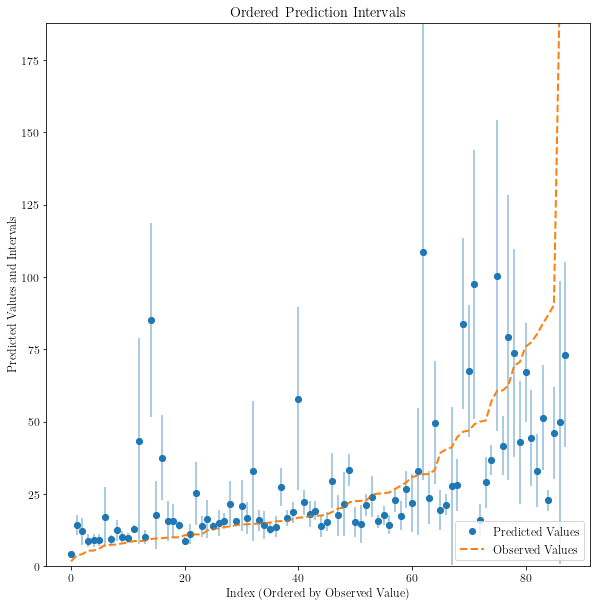

In [7]:
# plt.rcParams['font.family'] = 'serif'
# plt.rcParams['font.serif'] = 'Garamond'

# Define fonts and font sizes
font = {'family': 'serif', 'serif': ['Times New Roman'], 'size': 12}
plt.rc('font', **font)
plt.rc('text', usetex=True)  # This line is for LaTeX rendering, optional


# Plot ordered prediction intervals
uct.viz.plot_intervals_ordered(np.array(y_pred[::50]), np.array(predictions_std[::50]), np.array(y[::50]))

# Adjust the plot size
plt.gcf().set_size_inches(10, 10)
# Save the figure with high quality
# plt.savefig('your_plot2.png', dpi=300, bbox_inches='tight', format='png', facecolor = 'w')

# # Show the plot
# plt.show()



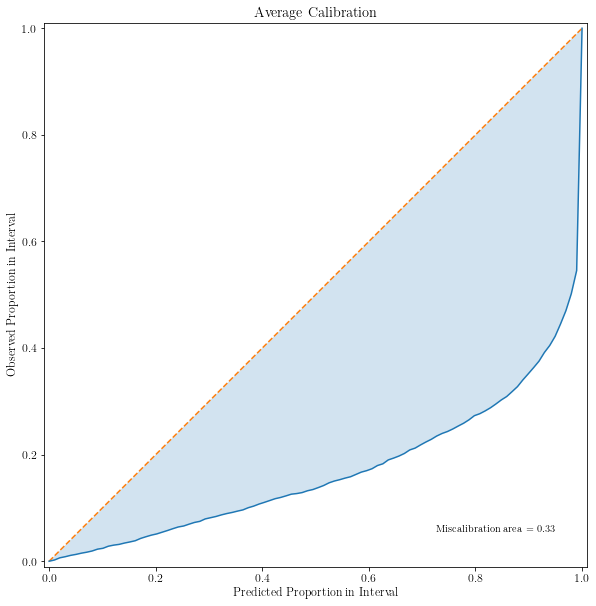

In [8]:
# Plot average calibration
uct.viz.plot_calibration(np.array(y_pred), np.array(predictions_std), np.array(y))
plt.gcf().set_size_inches(10, 10)

In [9]:
LUCAS_all

,OID_,Point_ID,long,lat,Clay,Sand,Silt,pH_CaCl2,pH_H20,EC,...,K,LC,LU,NUTS_0,NUTS_1,NUTS_2,NUTS_3,LC0_Desc,LC1_Desc,LU1_Desc
0,1,26581768,-8.775252,37.139104,0,0,0,6.9,7.24,18.14,...,245.6,E20,U111,PT,PT1,PT15,PT150,Grassland,Grassland without tree/shrub cover,Agriculture (excluding fallow land and kitchen...
1,2,26581792,-8.833728,37.349747,0,0,0,5.4,5.81,14.81,...,150.0,D20,U410,PT,PT1,PT15,PT150,Shrubland,Shrubland without tree cover,Abandoned areas
2,3,26581954,-9.242092,38.768531,0,0,0,7.0,7.29,28.10,...,505.2,E30,U112,PT,PT1,PT17,PT170,Grassland,Spontaneously re-vegetated surfaces,Fallow land
3,4,26601784,-8.792255,37.283972,0,0,0,4.4,5.17,5.37,...,103.8,D10,U120,PT,PT1,PT15,PT150,Shrubland,Shrubland with sparse tree cover,Forestry
4,5,26601978,-9.282250,38.982827,0,0,0,7.1,7.38,21.60,...,174.6,C10,U120,PT,PT1,PT17,PT170,Woodland,Broadleaved woodland,Forestry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21854,21855,64881666,33.907085,34.989242,50,23,27,6.7,6.97,21.10,...,1123.0,F40,U112,CY,CY0,CY00,CY000,Bareland,Other bare soil,Fallow land
21855,21856,64901668,33.933925,35.000901,32,39,28,7.3,7.79,10.84,...,658.4,E30,U420,CY,CY0,CY00,CY000,Grassland,Spontaneously re-vegetated surfaces,Semi-natural and natural areas not in use
21856,21857,64901672,33.945599,35.035389,34,43,23,7.3,7.80,15.09,...,479.1,B13,U111,CY,CY0,CY00,CY000,Cropland,Barley,Agriculture (excluding fallow land and kitchen...
21857,21858,64961676,34.020365,35.053061,10,79,11,7.4,8.05,15.50,...,511.0,E30,U420,CY,CY0,CY00,CY000,Grassland,Spontaneously re-vegetated surfaces,Semi-natural and natural areas not in use


In [10]:
# List of columns to keep from LUCAS_all
columns_to_keep = ['Point_ID', 'long', 'lat', 'LC0_Desc', 'LC1_Desc', 'LU1_Desc']

In [11]:
cqr_all = pd.merge(LUCAS_cqr, LUCAS_all[columns_to_keep], on='Point_ID', how='left')
cqr_all

,lower_oc,upper_oc,predicted_oc,standard_uncertainty,test_oc,Point_ID,long,lat,LC0_Desc,LC1_Desc,LU1_Desc
0,36.639847,46.757152,41.698500,0.164928,60.8,28762270,-7.560156,42.009170,Woodland,Broadleaved woodland,Semi-natural and natural areas not in use
1,28.703504,66.926127,47.814815,0.623090,9.7,53723904,27.513236,57.073428,Cropland,Rape and turnip rape,Agriculture (excluding fallow land and kitchen...
2,24.335435,39.862119,32.098777,0.253110,173.4,42643252,9.163027,52.374514,Woodland,Broadleaved woodland,Forestry
3,15.718832,31.882648,23.800740,0.263496,12.3,53023608,25.321054,54.636147,Grassland,Grassland without tree/shrub cover,Agriculture (excluding fallow land and kitchen...
4,11.338693,17.259962,14.299328,0.096526,15.2,49763304,19.667528,52.452906,Cropland,Oats,Agriculture (excluding fallow land and kitchen...
...,...,...,...,...,...,...,...,...,...,...,...
4367,23.452268,29.758095,26.605181,0.102795,11.4,43043486,9.737805,54.479966,Cropland,Common wheat,Agriculture (excluding fallow land and kitchen...
4368,7.977015,10.740932,9.358974,0.045056,15.8,32381944,-2.637819,39.775773,Cropland,Barley,Agriculture (excluding fallow land and kitchen...
4369,17.379394,27.388966,22.384180,0.163172,12.6,41342740,7.507377,47.745254,Cropland,Maize,Agriculture (excluding fallow land and kitchen...
4370,15.851911,20.074580,17.963246,0.068836,24.9,32502072,-2.727974,40.934053,Cropland,Barley,Agriculture (excluding fallow land and kitchen...


In [13]:
plt.rc('text', usetex=False)

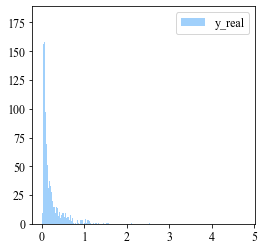

In [14]:
plt.figure(figsize=(4, 4))
colors = ['#43a2f8', '#f27085', '#2ca02c', '#ffd700']

plt.hist(cqr_all['standard_uncertainty'], bins=1000, alpha=0.5, label='y_real', color=colors[0])
# plt.hist(cqr_all['predicted_oc'], bins=100, alpha=0.5, label='y_rf', color=colors[1])

plt.legend(loc='upper right')
plt.show()

In [15]:
# Define the bin edges and labels
bins = [-float('inf'), 1, float('inf')]
labels = ['Low', 'High']

# Use pd.cut to categorize the 'un' column
cqr_all['Category'] = pd.cut(cqr_all['standard_uncertainty'], bins=bins, labels=labels)

In [16]:
cqr_all

,lower_oc,upper_oc,predicted_oc,standard_uncertainty,test_oc,Point_ID,long,lat,LC0_Desc,LC1_Desc,LU1_Desc,Category
0,36.639847,46.757152,41.698500,0.164928,60.8,28762270,-7.560156,42.009170,Woodland,Broadleaved woodland,Semi-natural and natural areas not in use,Low
1,28.703504,66.926127,47.814815,0.623090,9.7,53723904,27.513236,57.073428,Cropland,Rape and turnip rape,Agriculture (excluding fallow land and kitchen...,Low
2,24.335435,39.862119,32.098777,0.253110,173.4,42643252,9.163027,52.374514,Woodland,Broadleaved woodland,Forestry,Low
3,15.718832,31.882648,23.800740,0.263496,12.3,53023608,25.321054,54.636147,Grassland,Grassland without tree/shrub cover,Agriculture (excluding fallow land and kitchen...,Low
4,11.338693,17.259962,14.299328,0.096526,15.2,49763304,19.667528,52.452906,Cropland,Oats,Agriculture (excluding fallow land and kitchen...,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
4367,23.452268,29.758095,26.605181,0.102795,11.4,43043486,9.737805,54.479966,Cropland,Common wheat,Agriculture (excluding fallow land and kitchen...,Low
4368,7.977015,10.740932,9.358974,0.045056,15.8,32381944,-2.637819,39.775773,Cropland,Barley,Agriculture (excluding fallow land and kitchen...,Low
4369,17.379394,27.388966,22.384180,0.163172,12.6,41342740,7.507377,47.745254,Cropland,Maize,Agriculture (excluding fallow land and kitchen...,Low
4370,15.851911,20.074580,17.963246,0.068836,24.9,32502072,-2.727974,40.934053,Cropland,Barley,Agriculture (excluding fallow land and kitchen...,Low


In [17]:
# Eliminate rows with 'Low' category
cqr_high = cqr_all[cqr_all['Category'] == 'High']

# Eliminate rows with 'Low' category
cqr_low = cqr_all[cqr_all['Category'] == 'Low']

In [18]:
# cqr_all.to_csv('D:\Conformalized_Quantile_Regression\LUCAS_2015_cqr_all.csv', index = False)
# cqr_low.to_csv('D:\Conformalized_Quantile_Regression\LUCAS_2015_cqr_low.csv', index = False)
# cqr_high.to_csv('D:\Conformalized_Quantile_Regression\LUCAS_2015_cqr_high.csv', index = False)

In [19]:
def plot_uncertainty(category_column, standard_uncertainty):
    # Get unique categories in the categorical column
    unique_categories = np.unique(category_column)

    # Calculate the mean MAE for each category
    mean_standard_uncertainty = []
    counts = []
    for category in unique_categories:
        category_indices = category_column == category
        category_standard_uncertainty = standard_uncertainty[category_indices]
        mean_standard_uncertainty.append(np.mean(category_standard_uncertainty))
        counts.append(np.sum(category_indices))

    plt.figure(figsize=(20, 10), facecolor='white')
    # Create a ScalarMappable object to map colors to counts
    norm = plt.Normalize(min(counts), max(counts))
    cmap = cm.get_cmap('coolwarm')
    sm = cm.ScalarMappable(norm=norm, cmap=cmap)
    sm.set_array([])

    # Plot the bar plot with colored bars
    bars = plt.bar(unique_categories, mean_standard_uncertainty, color=sm.to_rgba(counts))

    # Create a color legend
    cbar = plt.colorbar(sm)
    cbar.set_label('Counts')

    # Rotate x-axis labels (if needed)
    plt.xticks(rotation=90)  # You can adjust the rotation as needed

    plt.xlabel('Categories')
    plt.ylabel('Mean standard_uncertainty')
    plt.title('Mean standard_uncertainty per Category')
    plt.show()


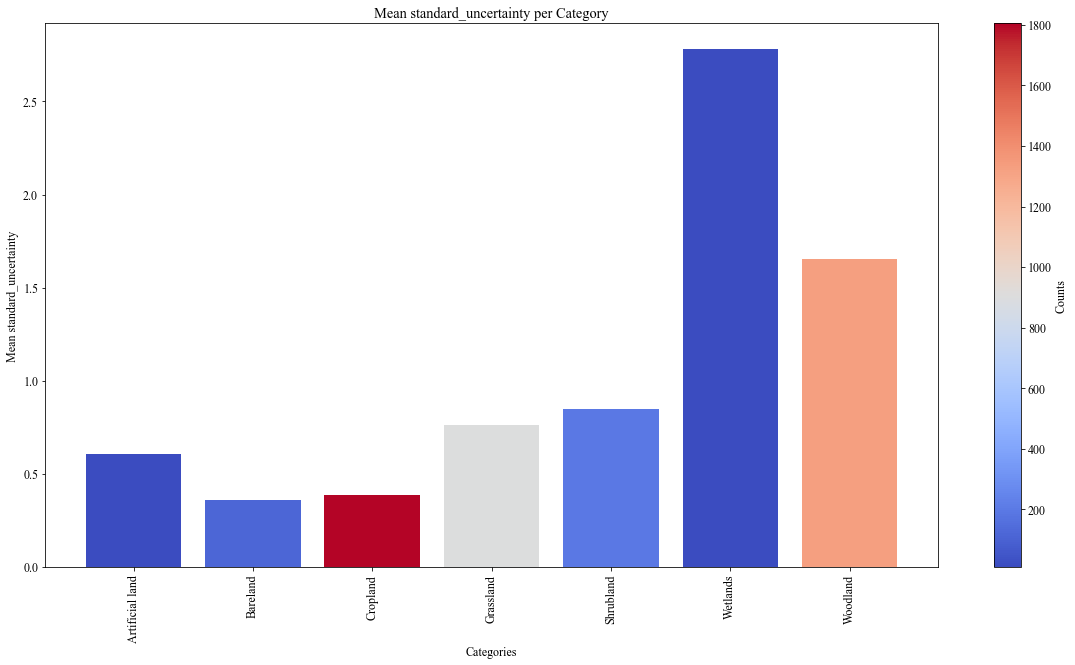

In [19]:
# Example usage
category_column = cqr_all['LC0_Desc']  # Replace 'Category' with the name of your categorical column
standard_uncertainty = cqr_all['standard_uncertainty']
plot_uncertainty(category_column, standard_uncertainty )

In [20]:
def plot_func_data(y_test,y_lower,y_upper,name=""):
    """ Plot the test labels along with the constructed prediction band

    Parameters
    ----------

    y_test : numpy array, true labels (n)
    y_lower : numpy array, estimated lower bound for the labels (n)
    y_upper : numpy array, estimated upper bound for the labels (n)
    name : string, optional output string (e.g. the method name)

    """

    # allowed to import graphics
    import matplotlib.pyplot as plt

    interval = y_upper - y_lower
    sort_ind = np.argsort(interval)
    y_test_sorted = y_test[sort_ind]
    upper_sorted = y_upper[sort_ind]
    lower_sorted = y_lower[sort_ind]
    mean = (upper_sorted + lower_sorted) / 2

    # # Center such that the mean of the prediction interval is at 0.0
    # y_test_sorted -= mean
    # upper_sorted -= mean
    # lower_sorted -= mean

    plt.figure(figsize=(20, 10), facecolor='white')
    # Plot each sample as a circle with a black edge and transparent filling
    plt.scatter(range(len(y_test_sorted)), y_test_sorted,
                 label='Test Values', color='none', edgecolors='black', alpha=0.3, marker='o')
    plt.fill_between(
        np.arange(len(upper_sorted)), lower_sorted, upper_sorted, alpha=0.2, color="r",
        label="Pred. interval")
    plt.xlabel("Ordered samples", fontsize=14, fontweight='bold')
    plt.ylabel("Values and prediction intervals", fontsize=14, fontweight='bold')

    plt.title(name, fontsize=16, fontweight='bold')
    plt.show()

    # interval = y_upper - y_lower
    # sort_ind = np.argsort(y_test)
    # y_test_sorted = y_test[sort_ind]
    # upper_sorted = y_upper[sort_ind]
    # lower_sorted = y_lower[sort_ind]

    # plt.figure(figsize=(20, 10), facecolor='white')
    # plt.scatter(range(len(y_test_sorted)), y_test_sorted,
    #              label='Test Values', color='none', edgecolors='black', alpha=0.3, marker='o')
    # plt.fill_between(
    #     np.arange(len(upper_sorted)), lower_sorted, upper_sorted, alpha=0.2, color="r",
    #     label="Pred. interval")
    # plt.xlabel("Ordered samples by response")
    # plt.ylabel("Values and prediction intervals")

    # plt.title(name)
    # plt.show()


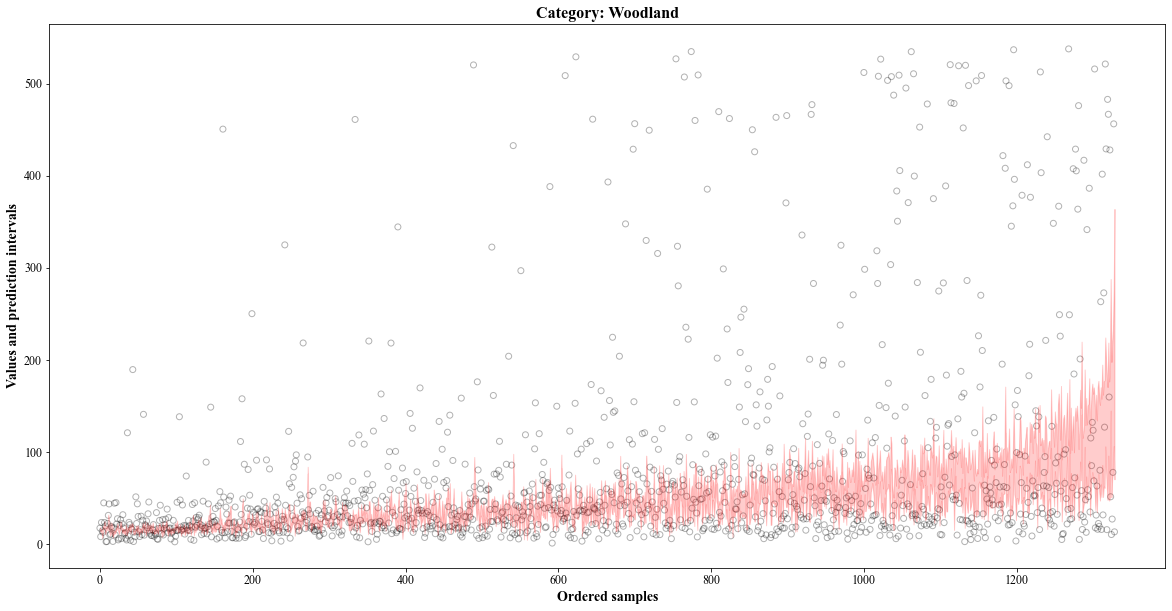

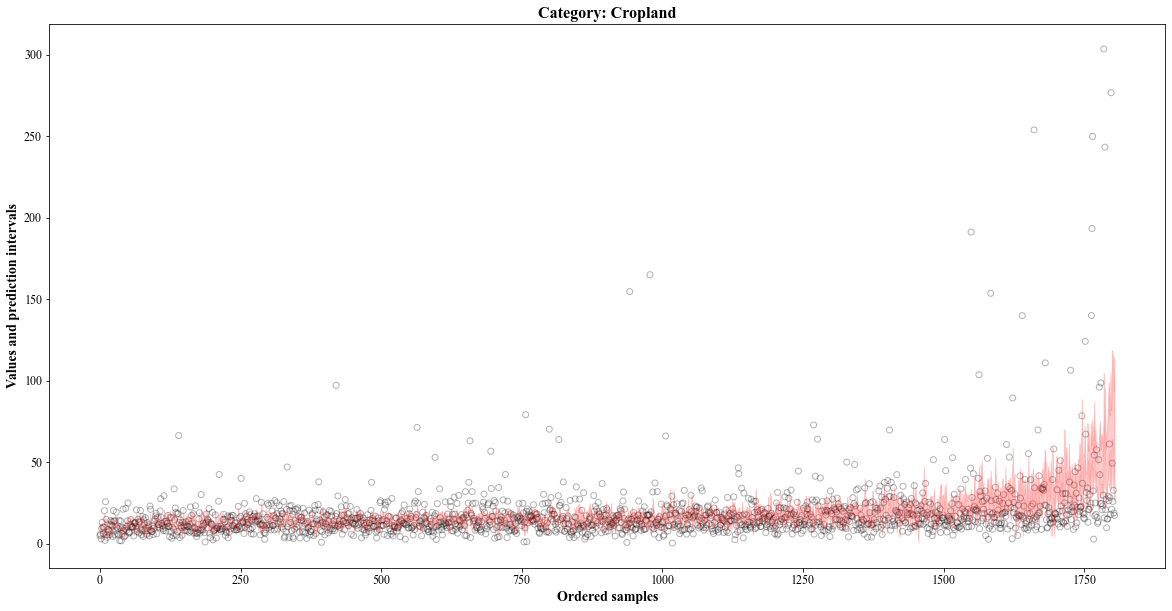

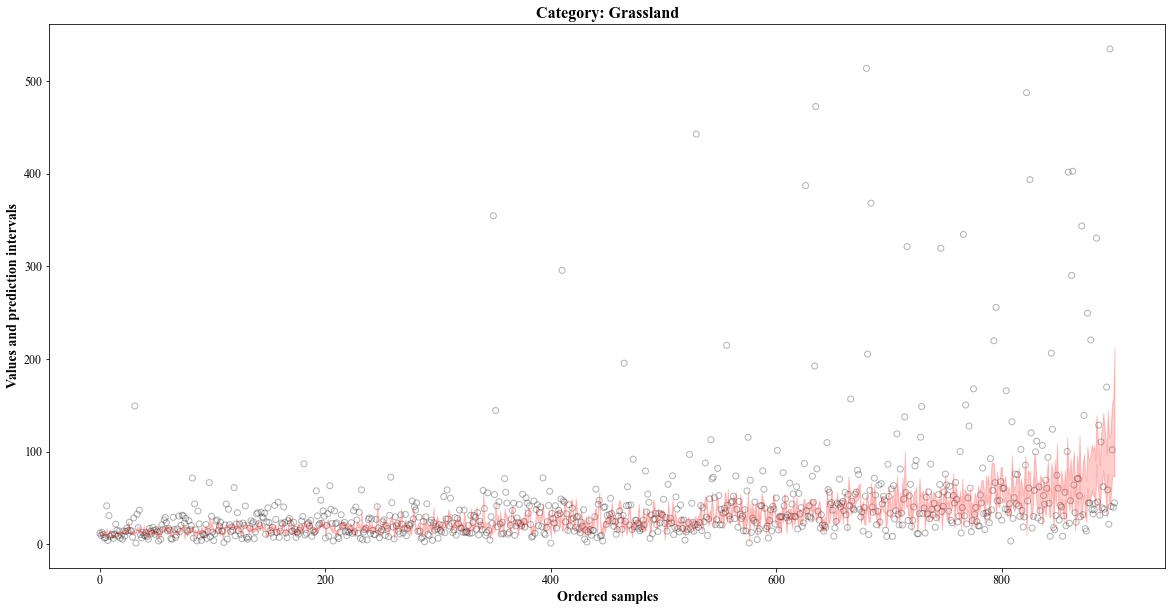

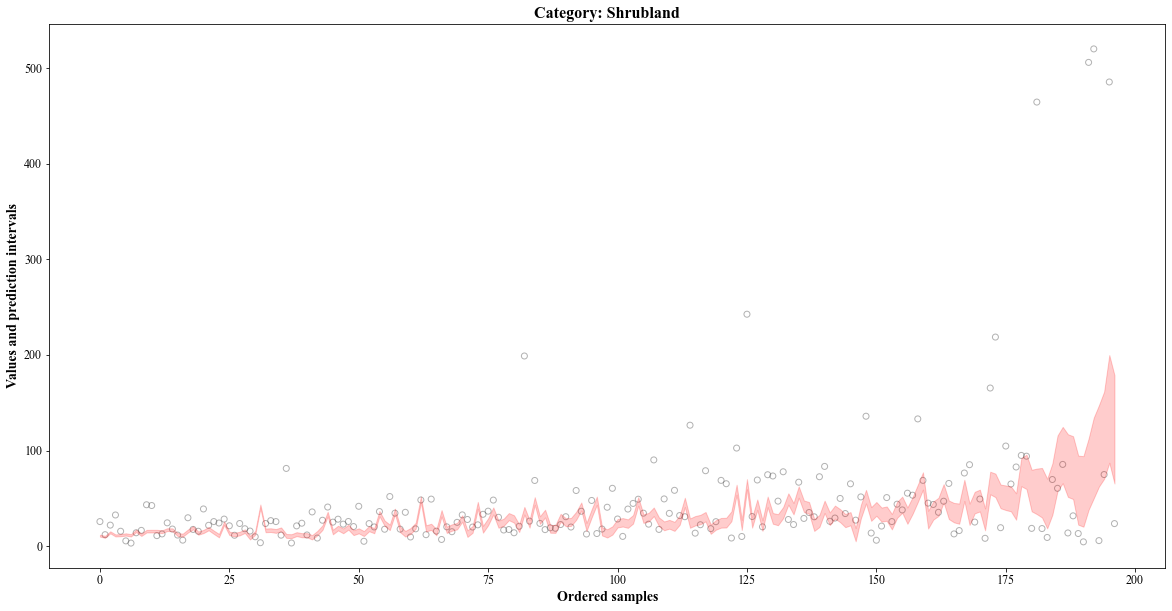

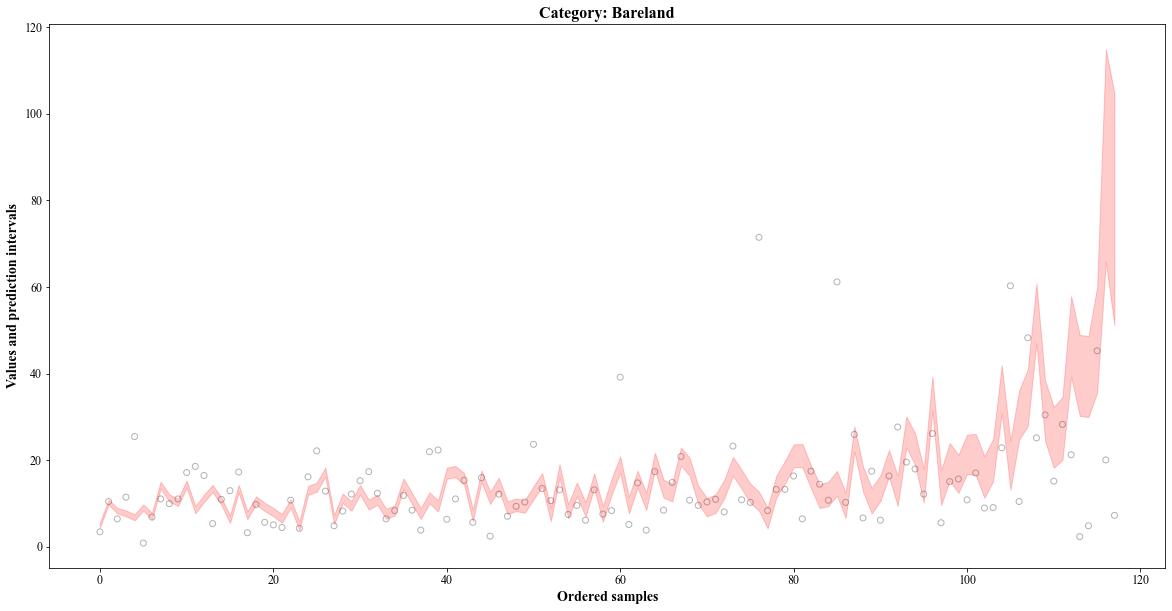

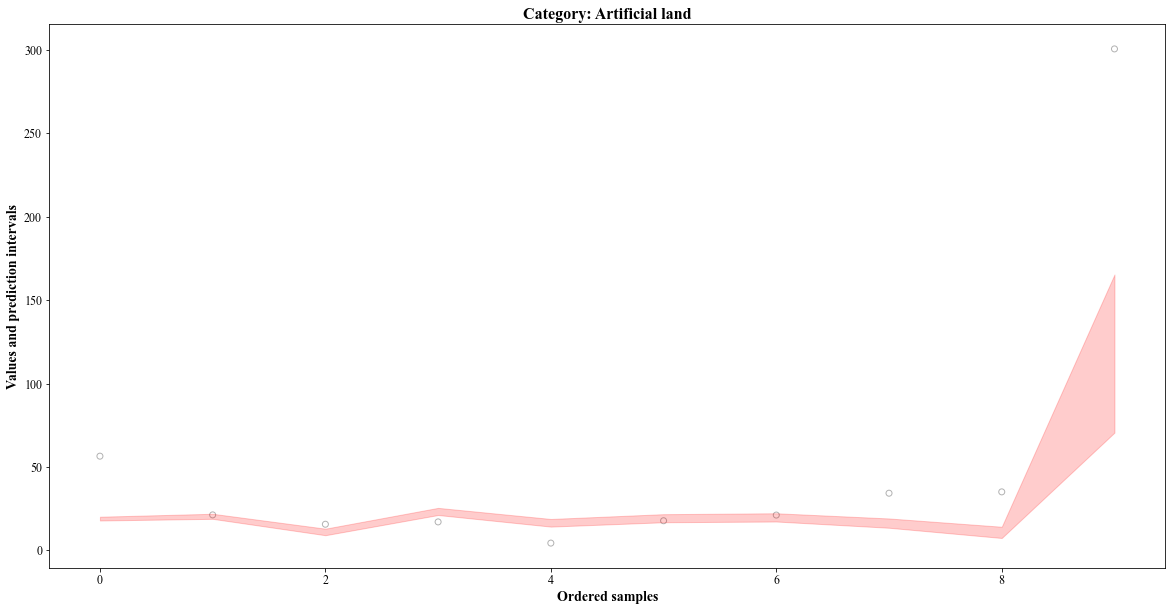

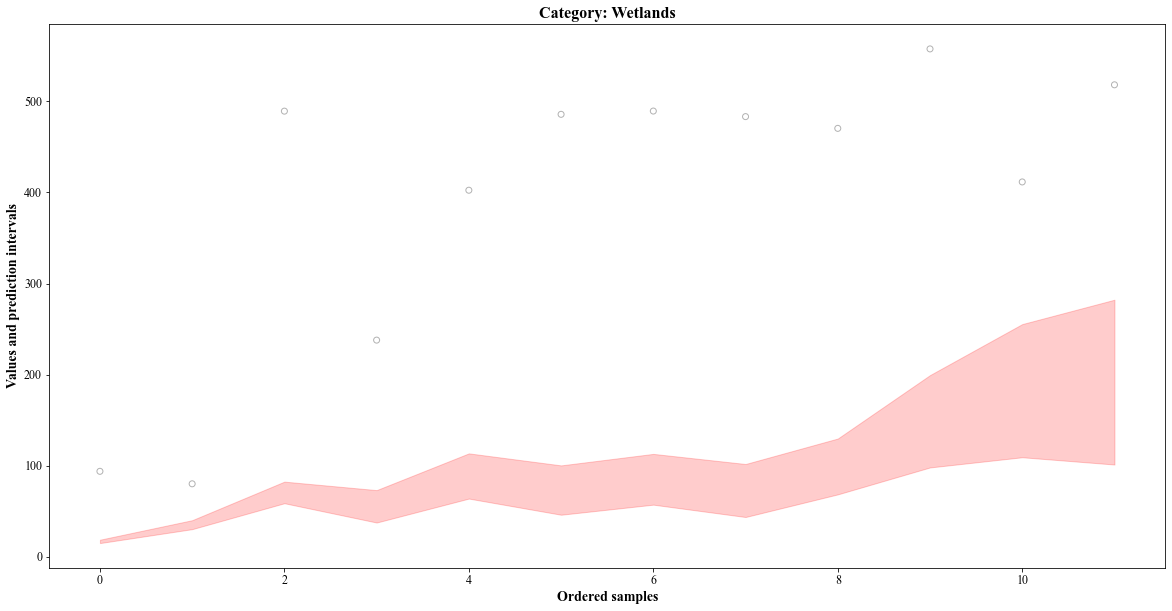

In [21]:
# Get unique categories from the 'LC0_Desc' column
unique_categories = cqr_all['LC0_Desc'].unique()

# Iterate through unique categories
for category in unique_categories:
    # Filter the DataFrame to include only rows where 'LC0_Desc' equals the current category
    filtered_df = cqr_all[cqr_all['LC0_Desc'] == category]
    
    # Reset the index of filtered_df
    filtered_df = filtered_df.reset_index(drop=True)
    
    # Extract the relevant columns for the function
    y_test = filtered_df['test_oc']  # Replace with the actual column name
    y_lower = filtered_df['lower_oc']  # Replace with the actual column name
    y_upper = filtered_df['upper_oc']  # Replace with the actual column name
    
    # Call the plot_func_data function with the filtered data and a custom name
    plot_func_data(y_test, y_lower, y_upper, name=f"Category: {category}")


# plot_func_data(filtered_df['test_oc'],filtered_df['lower_oc'],filtered_df['upper_oc'],"RF")